## Data Preparation

In [52]:
# Get your import statement here
import pandas as pd
import numpy as np
import scipy.stats
import math
import statistics
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
from matplotlib import rcParams
rcParams['figure.figsize']=(10,7)
rcParams['lines.linewidth']=2.5
rcParams['xtick.labelsize']='x-large'
rcParams['ytick.labelsize']='x-large'
#load dataset from GDrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Load your dataset here
df = pd.read_csv('drive/My Drive/DS/nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [54]:
# Write your syntax here
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [55]:
# Write your syntax here
df.shape

(84548, 22)

#Mengubah tipe data, hapus Kolom yang tidak penting

In [56]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df.drop(['Unnamed: 0', 'APARTMENT NUMBER','EASE-MENT'], axis=1, inplace=True)
df


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [58]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


Memisahkan kolom berdasarkan tipe data dan mengubah tipe data yang kurang sesuai

In [59]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

nums = ['BLOCK','RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH', 'YEAR BUILT']
for col in nums: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in cats:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [60]:
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

Our dataset is ready for checking missing values.

In [61]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [62]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [63]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [64]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27,2017
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27,2017
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11,2017
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11,2017
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06,2017
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06,2017
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21,2017
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21,2017
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12,2017
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12,2017


The dataframe has 765 duplicated rows (exluding the original rows).

In [65]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

In [66]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.773400e+04,5.773400e+04,83783.000000,6.960700e+04,83783.000000
mean,2.999308,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,3.857326e+03,4.206654e+03,1789.814318,1.280703e+06,2016.650920
std,1.288668,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,4.154676e+04,4.209695e+04,536.565051,1.143036e+07,0.476682
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,2.000000,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.643000e+03,1.056000e+03,1920.000000,2.300000e+05,2016.000000
50%,3.000000,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.315000e+03,1.700000e+03,1940.000000,5.330000e+05,2017.000000
75%,4.000000,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.600000e+03,1965.000000,9.500000e+05,2017.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09,2017.000000


In [67]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04,78777.000000
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05,2016.652767
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06,0.476094
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05,2016.000000
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05,2017.000000
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05,2017.000000
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08,2017.000000


Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [68]:
df[df['RESIDENTIAL UNITS']==0].describe()


,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE YEAR
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04,24546.000000
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06,2016.657582
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07,0.474528
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016.000000
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05,2016.000000
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05,2017.000000
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05,2017.000000
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09,2017.000000


Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [69]:
# Write your syntax below
df['BOROUGH'].value_counts()


4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

# Melihat Rata-Rata semua kolom

In [70]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


BOROUGH              2.999308e+00
BLOCK                4.242903e+03
LOT                  3.761374e+02
ZIP CODE             1.073324e+04
RESIDENTIAL UNITS    1.999976e+00
COMMERCIAL UNITS     1.836769e-01
TOTAL UNITS          2.213504e+00
LAND SQUARE FEET     3.857326e+03
GROSS SQUARE FEET    4.206654e+03
YEAR BUILT           1.789814e+03
SALE PRICE           1.280703e+06
SALE YEAR            2.016651e+03
dtype: float64

Text(0.5, 1.0, 'Rata-Rata Total Unit yang terjual dan Tahun Pembuatan 1900-2001')

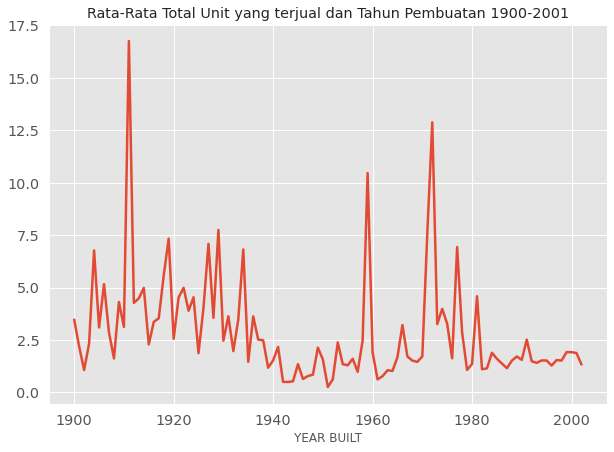

In [71]:
df[df['YEAR BUILT'].between(1900, 2002)].groupby(['YEAR BUILT'])['TOTAL UNITS'].mean().plot(kind='line')
plt.title('Rata-Rata Total Unit yang terjual dan Tahun Pembuatan 1900-2001')



*   Dari tahun 1900-2001 Rata-Rata Total unit yang terjual berdasarkan tahun pembuatan mengalami kenaikan dan penurunan
*   Unit yang paling banyak terjual yaitu yang dibangun pada tahun 1910
*   Unit yang paling sedikit terjual yaitu unit yang dibangun pada tahun 1950




Text(0.5, 1.0, 'Rata-Rata Total Unit yang terjual pada tahun 2016 -2017')

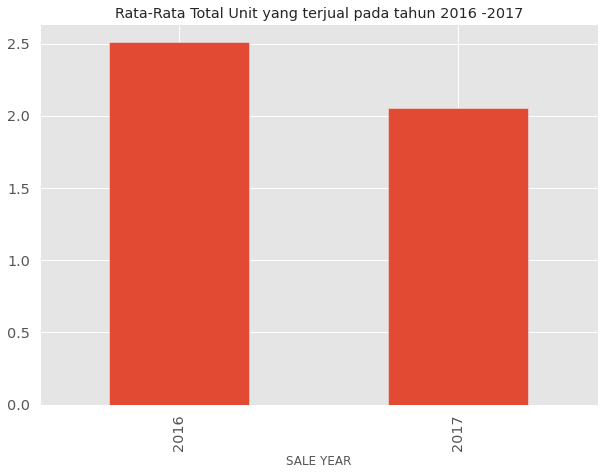

In [72]:
df.groupby(['SALE YEAR'])['TOTAL UNITS'].mean().plot.bar()
plt.title('Rata-Rata Total Unit yang terjual pada tahun 2016 -2017')


*   Rata-Rata unit yang terjual pada tahun 2016 lebih banyak daripada rata-rata unit yang terjual pada tahun 2017


# Mengganti kode angka dengan nama Kota

In [73]:
df_br = df.copy()
df_br['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'}, inplace=True)
df_br.sample(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR
11082,Manhattan,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,1432,R4,30 LITTLE WEST STREET,10004,1,0,1,NaN,NaN,2005,2,R4,2675000.0,2017-07-05,2017
64962,Queens,JAMAICA ESTATES,01 ONE FAMILY DWELLINGS,1,9961,43,A1,187-28 87TH ROAD,11432,1,0,1,2500.0,1496.0,1930,1,A1,10.0,2017-01-23,2017
17094,Manhattan,UPPER WEST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1203,1002,R4,30 WEST 90TH STREET,10024,1,0,1,NaN,NaN,0,2,R4,670000.0,2016-09-23,2016
23933,Bronx,SOUNDVIEW,05 TAX CLASS 1 VACANT LAND,1B,3498,5,V0,1869 PATTERSON AVENUE,10473,0,0,0,2500.0,0.0,0,1,V0,110000.0,2017-07-11,2017
17511,Manhattan,UPPER WEST SIDE (96-116),03 THREE FAMILY DWELLINGS,1,1889,113,C0,311 WEST 100TH STREET,10025,3,0,3,1817.0,5220.0,1900,1,C0,5000000.0,2017-04-07,2017


Text(0.5, 1.0, 'Rata-Rata Unit yang terjual berdasarkan Kota')

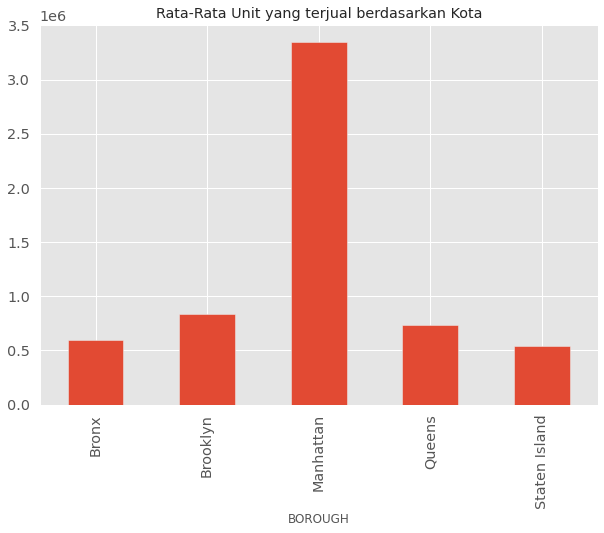

In [74]:
df_br.groupby(['BOROUGH'])['SALE PRICE'].mean().plot.bar()
plt.title('Rata-Rata Unit yang terjual berdasarkan Kota')



*   Bangunan yang paling banyak terjual yaitu di Kota Manhattan
*   Bangunan yang paling sedikit terjual yaitu di Kota Staten Island 



From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

# Median / Nilai Tengah semua kolom

In [75]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


BOROUGH                   3.0
BLOCK                  3319.0
LOT                      50.0
ZIP CODE              11209.0
RESIDENTIAL UNITS         1.0
COMMERCIAL UNITS          0.0
TOTAL UNITS               1.0
LAND SQUARE FEET       2315.0
GROSS SQUARE FEET      1700.0
YEAR BUILT             1940.0
SALE PRICE           533000.0
SALE YEAR              2017.0
dtype: float64

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

# Nilai yang paling sering muncul (Modus)

In [76]:
df.mode()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,10314,1,0,1,0.0,0.0,0,1,R4,0.0,2017-06-29,2017


From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

# Range (Perbedaan antara nilai terendah dan tertinggi) untuk setiap kolom

In [77]:
df[nums].max()-df[nums].min()

BLOCK                1.632100e+04
RESIDENTIAL UNITS    1.844000e+03
COMMERCIAL UNITS     2.261000e+03
TOTAL UNITS          2.261000e+03
LAND SQUARE FEET     4.252327e+06
GROSS SQUARE FEET    4.252327e+06
SALE PRICE           2.210000e+09
BOROUGH              4.000000e+00
YEAR BUILT           2.017000e+03
dtype: float64

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

# Variance : Kuadrat jarak rata-rata setiap kuantitas dan rata-rata (mean)

In [78]:
df.var()

BOROUGH              1.660666e+00
BLOCK                1.273626e+07
LOT                  4.329920e+05
ZIP CODE             1.663492e+06
RESIDENTIAL UNITS    2.745357e+02
COMMERCIAL UNITS     7.355776e+01
TOTAL UNITS          3.526030e+02
LAND SQUARE FEET     1.726133e+09
GROSS SQUARE FEET    1.772153e+09
YEAR BUILT           2.879021e+05
SALE PRICE           1.306532e+14
SALE YEAR            2.272260e-01
dtype: float64

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

* Standard Deviation : Pengukuran jarak rata-rata setiap besaran dan mean, bagaimana data disebarkan/seberapa tersebar data dari mean




In [79]:
df.std(ddof=1)

BOROUGH              1.288668e+00
BLOCK                3.568789e+03
LOT                  6.580213e+02
ZIP CODE             1.289764e+03
RESIDENTIAL UNITS    1.656912e+01
COMMERCIAL UNITS     8.576582e+00
TOTAL UNITS          1.877773e+01
LAND SQUARE FEET     4.154676e+04
GROSS SQUARE FEET    4.209695e+04
YEAR BUILT           5.365651e+02
SALE PRICE           1.143036e+07
SALE YEAR            4.766823e-01
dtype: float64

# Skewness : Ukuran asimetri distribusi probabilitas dari real-valued random variabel tentang rata-ratanya

In [80]:
df.skew()

BOROUGH               -0.326867
BLOCK                  1.046322
LOT                    3.506785
ZIP CODE              -6.661757
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.758940
GROSS SQUARE FEET     58.740909
YEAR BUILT            -3.022275
SALE PRICE           123.943132
SALE YEAR             -0.633224
dtype: float64

# Melihat distribusi nilai setiap kolom dengan Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

ValueError: ignored

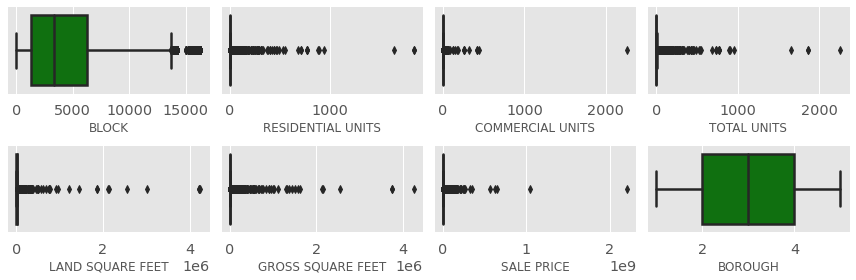

In [82]:
features = nums
plt.figure(figsize=(12,4))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[features[i]], color='green', orient='v')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

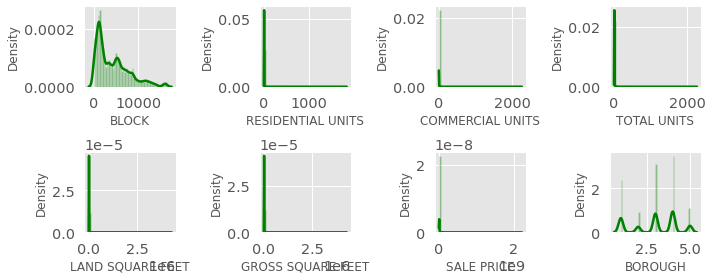

In [83]:
features = nums
plt.figure(figsize=(10,4))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.distplot(df[features[i]], color='green')
  plt.tight_layout()



*   Gambar menunjukkan bahwa skew termasuk positive karena ekor yang lebih panjang berada di sisi kanan




# Correlation Heatmap

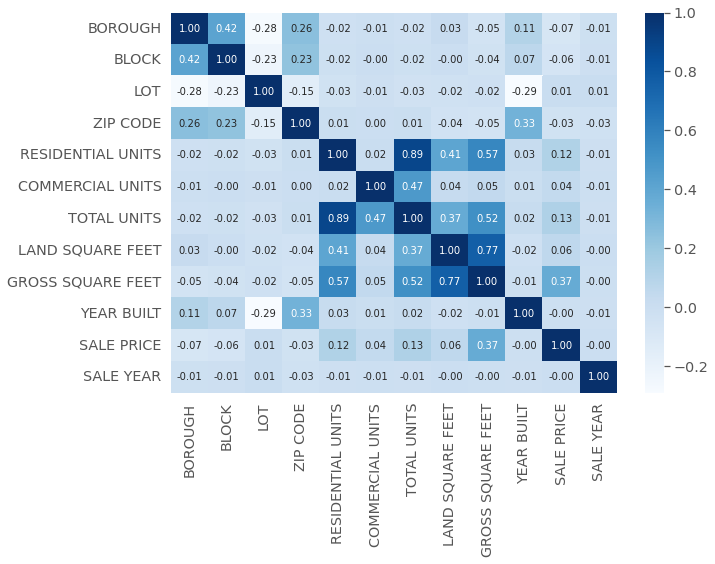

In [84]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

 lebih dari 0.7 = Korelasi kuat

*   feature Total Units memiliki korelasi yang kuat dengan Residential Units 
*   feature Gross Square Feet memiliki korelasi yang kuat dengan Land Square Feet



Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Distribution of Sale Price')]

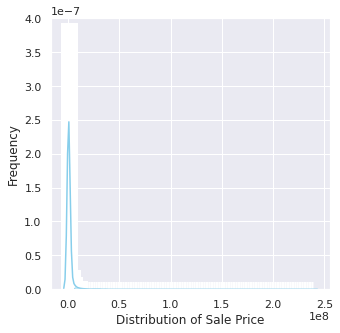

In [85]:
from IPython.display import Math, Latex
from IPython.core.display import Image

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

ax = sns.distplot(df['SALE PRICE'].sample(2500),
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution of Sale Price', ylabel='Frequency')



*   Karena grafik menurun maka termasuk Exponential Distribution (Menggambarkan waktu proses peristiwa yang terjadi terus menerus dan independen pada tingkat rata-rata yang konstan)




Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [86]:
df_ci = df.copy()
df_ci['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'}, inplace=True)
df_ci

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE YEAR
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,2016
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,2016
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,2016
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,2017
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,2017
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,2016


# Confidence Intervals
Population Proportion

Menggunakan kolom 'Borough (Kota)' dan kolom 'Sale Year' yang berisi tahun terjualnya bangunan.

In [87]:
#Menghapus nilai yang kosong
df_ci = df_ci[['BOROUGH', 'SALE YEAR']].dropna()

In [88]:
#mengganti nama kolom
df_ci.rename(columns = {'SALE YEAR':'SALE_YEAR'}, inplace=True)

In [90]:
#Jumlah transaksi unit yang terjual per tahun berdasarkan daerah
pd.crosstab( df_ci.SALE_YEAR, df_ci.BOROUGH)

BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island
SALE_YEAR,,,,,
2016,2427,8330,6121,9384,2985
2017,4567,15513,11981,17164,5311


In [91]:
#menghitung proporsi transaksi daerah Bronx 
#Tahun 2017 transaksi daerah Bronx 4567
p_bronx2017 = 4567 / (2427+4567) 
p_bronx2017

0.6529882756648556

In [92]:
#jumlah seluruh data daerah Bronx
n = 2427+4567
n

6994

In [93]:
#menghitung standard error
se_p = np.sqrt(p_bronx2017 * (1-p_bronx2017) / n)
se_p

0.005691961475395661

In [100]:
#menghitung CI dengan rumus Z-Score 
z_score = 1.96 
lcb = p_bronx2017 - z_score * se_p
ucb = p_bronx2017 + z_score * se_p
print ('Confidence Interval = ',lcb, ucb)

Confidence Interval =  0.6418320311730801 0.6641445201566312


In [95]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * p_bronx2017, n)

(0.6418322361716906, 0.6641443151580206)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


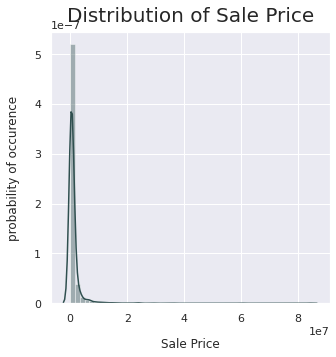

In [96]:
sns.distplot(df['SALE PRICE'].sample(2000),
             color = "darkslategrey")
plt.xlabel("Sale Price",labelpad=14)
plt.ylabel("probability of occurence",labelpad=14)
plt.title("Distribution of Sale Price",y=1.015,fontsize=20);

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

 n1  = 317, Mean1 = 1.3123028391167193, SD1 = 3.55520745666086

 n2  = 131, Mean2 = 2.549618320610687, SD2 = 6.845788981284572

Ztest (-2.5049767382498596, 0.012245944699756336)


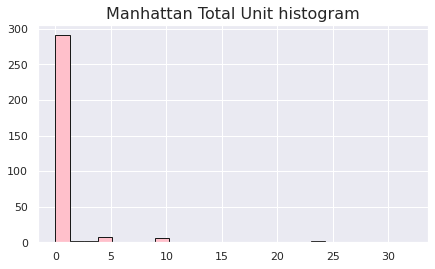

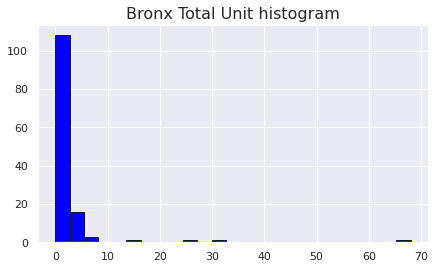

In [110]:
import statsmodels.api as sm
import scipy.stats.distributions as dist
dfh = df.copy()
dfh = dfh.sample(1500)
manhattan = dfh[dfh['BOROUGH']==1]
bronx = dfh[dfh['BOROUGH']==2]
brooklyn = dfh[dfh['BOROUGH']==3]
queens = dfh[dfh['BOROUGH']==4]
staten = dfh[dfh['BOROUGH']==5]


#n1 = manhattan
n1 = len(manhattan)
mu1 = manhattan["TOTAL UNITS"].mean()
sd1 = manhattan["TOTAL UNITS"].std()
print(f' n1  = {n1}, Mean1 = {mu1}, SD1 = {sd1}\n')

#n2 = bronx
n2 = len(bronx)
mu2 = bronx["TOTAL UNITS"].mean()
sd2 = bronx["TOTAL UNITS"].std()
print(f' n2  = {n2}, Mean2 = {mu2}, SD2 = {sd2}\n')
"""
#n3 = brooklyn
n3 = len(brooklyn)
mu3 = brooklyn["TOTAL UNITS"].mean()
sd3 = brooklyn["TOTAL UNITS"].std()
print(f' n3  = {n3}, Mean3 = {mu3}, SD3 = {sd3}\n')

#n4 = queens
n4 = len(queens)
mu4 = queens["TOTAL UNITS"].mean()
sd4 = queens["TOTAL UNITS"].std()
print(f' n4  = {n4}, Mean4 = {mu4}, SD4 = {sd4}\n')

#n5 = staten
n5 = len(staten)
mu5 = staten["TOTAL UNITS"].mean()
sd5 = staten["TOTAL UNITS"].std()
print(f' n5  = {n5}, Mean5 = {mu5}, SD5 = {sd5}\n')
"""

#TESTING HASIL SURVEY
ztest = sm.stats.ztest(manhattan["TOTAL UNITS"].dropna(), 
bronx["TOTAL UNITS"].dropna(),alternative='two-sided')
print('Ztest', ztest)


plt.figure(figsize=(7,4))
plt.title("Manhattan Total Unit histogram",fontsize = 16 )
plt.hist(manhattan["TOTAL UNITS"].dropna(),edgecolor = 'k',color = 'pink', bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Bronx Total Unit histogram",fontsize = 16 )
plt.hist(bronx["TOTAL UNITS"].dropna(),edgecolor = 'k',color = 'blue', bins=25)
plt.show()


Write your final conclusion below.

Your conclusion below are graded. (1 Points)



*  Dengan hasil Ztest (-2.5049767382498596, 0.012245944699756336)
karena sangat kecil maka reject null hipotesis.
* Tidak terbukti bahwa daerah Bronx memiliki total units lebih rendah dari daerah Manhattan

